In [4]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")

In [5]:
# 1. 准备数据(wrap)
dataset = pdv.data.load_simulation_data()
# 直接可视化轨迹
dataset

{'id': 'synthetic/dyntoy/bifurcating_1',
 'cell_ids': ['C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14',
  'C15',
  'C16',
  'C17',
  'C18',
  'C19',
  'C20',
  'C21',
  'C22',
  'C23',
  'C24',
  'C25',
  'C26',
  'C27',
  'C28',
  'C29',
  'C30',
  'C31',
  'C32',
  'C33',
  'C34',
  'C35',
  'C36',
  'C37',
  'C38',
  'C39',
  'C40',
  'C41',
  'C42',
  'C43',
  'C44',
  'C45',
  'C46',
  'C47',
  'C48',
  'C49',
  'C50',
  'C51',
  'C52',
  'C53',
  'C54',
  'C55',
  'C56',
  'C57',
  'C58',
  'C59',
  'C60',
  'C61',
  'C62',
  'C63',
  'C64',
  'C65',
  'C66',
  'C67',
  'C68',
  'C69',
  'C70',
  'C71',
  'C72',
  'C73',
  'C74',
  'C75',
  'C76',
  'C77',
  'C78',
  'C79',
  'C80',
  'C81',
  'C82',
  'C83',
  'C84',
  'C85',
  'C86',
  'C87',
  'C88',
  'C89',
  'C90',
  'C91',
  'C92',
  'C94',
  'C95',
  'C96',
  'C97',
  'C98',
  'C99',
  'C100',
  'C101',
  'C102',
  'C103',
  'C104',
  'C105',
  'C106',
  'C

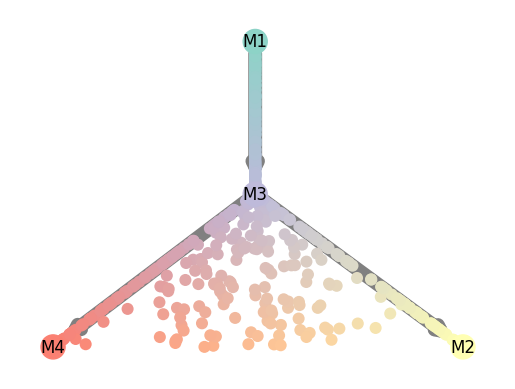

In [6]:
pdv.plot.plot_graph(dataset)

[2025年01月08日 18时38分40秒] INFO     Coloring by milestone                                                       
                        DEBUG    selecting waypoints                                                               
[2025年01月08日 18时38分47秒] DEBUG    selecting waypoints shape is (141, 926), finished!                          


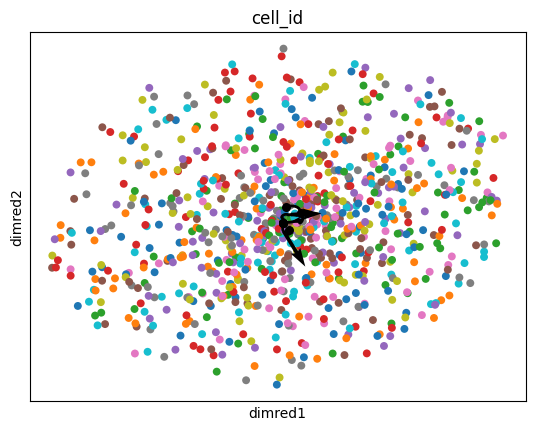

In [4]:
pdv.plot.plot_dimred(dataset)

In [4]:
# 3. 运行方法(wrap)
model = pdv.wrap.infer_trajectories(dataset, methods_selected) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

[2025年01月07日 10时21分37秒] DEBUG    Temp wd: /tmp/tmpns310oul                                                   
                        DEBUG    ti_paga_function executing                                                        
                        DEBUG    priors: {}                                                                        
                        DEBUG    parameters: {'dimred': 'pca', 'ndim': 2, 'component': 1}                          
                        DEBUG    seed: None                                                                        
[2025年01月07日 10时21分39秒] INFO     Methods executing finished, model: [{'dataset_ix': 0, 'method_ix': 0,       
                                       'dataset_id': 'synthetic/dyntoy/bifurcating_1', 'method_id': 'comp1',       
                                       'method_name': 'Component 1', 'model': {'id':                               
                                       '20250107_102139__data_wrapper__ypwmXzuos3', 

In [ ]:
# 4. 绘制轨迹(dimred+plot)
pdv.plot.plot_dimred(model[0]["model"], expression_source=dataset["expression"])
logger.info("Result plotting finished")

AttributeError: 'NoneType' object has no attribute 'shape'